In [1]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load data set
wbcdfile = "C:/Users/joeba/OneDrive/Documents/ML/wbcd/wbcd30.csv"
dataset = pd.read_csv(wbcdfile)
print(dataset.head())

   ID_number Diagnosis  radius_m  texture_m  perimeter_m  area_m  \
0     842302         M     17.99      10.38       122.80  1001.0   
1     842517         M     20.57      17.77       132.90  1326.0   
2   84300903         M     19.69      21.25       130.00  1203.0   
3   84348301         M     11.42      20.38        77.58   386.1   
4   84358402         M     20.29      14.34       135.10  1297.0   

   smoothness_m  compactness_m  concavity_m  concave_points_m  ...  radius_w  \
0       0.11840        0.27760       0.3001           0.14710  ...     25.38   
1       0.08474        0.07864       0.0869           0.07017  ...     24.99   
2       0.10960        0.15990       0.1974           0.12790  ...     23.57   
3       0.14250        0.28390       0.2414           0.10520  ...     14.91   
4       0.10030        0.13280       0.1980           0.10430  ...     22.54   

   texture_w  perimeter_w  area_w  smoothness_w  compactness_w  concavity_w  \
0      17.33       184.60  2019

In [3]:
X = dataset.iloc[:, 2:32].values
x = dataset.iloc[:, 2:32].columns
Y = dataset.iloc[:, 1].values
y = ['B', 'M']

In [4]:
# build an initial decision tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
#dt.fit(X_train, y_train)
dt.fit(X, Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

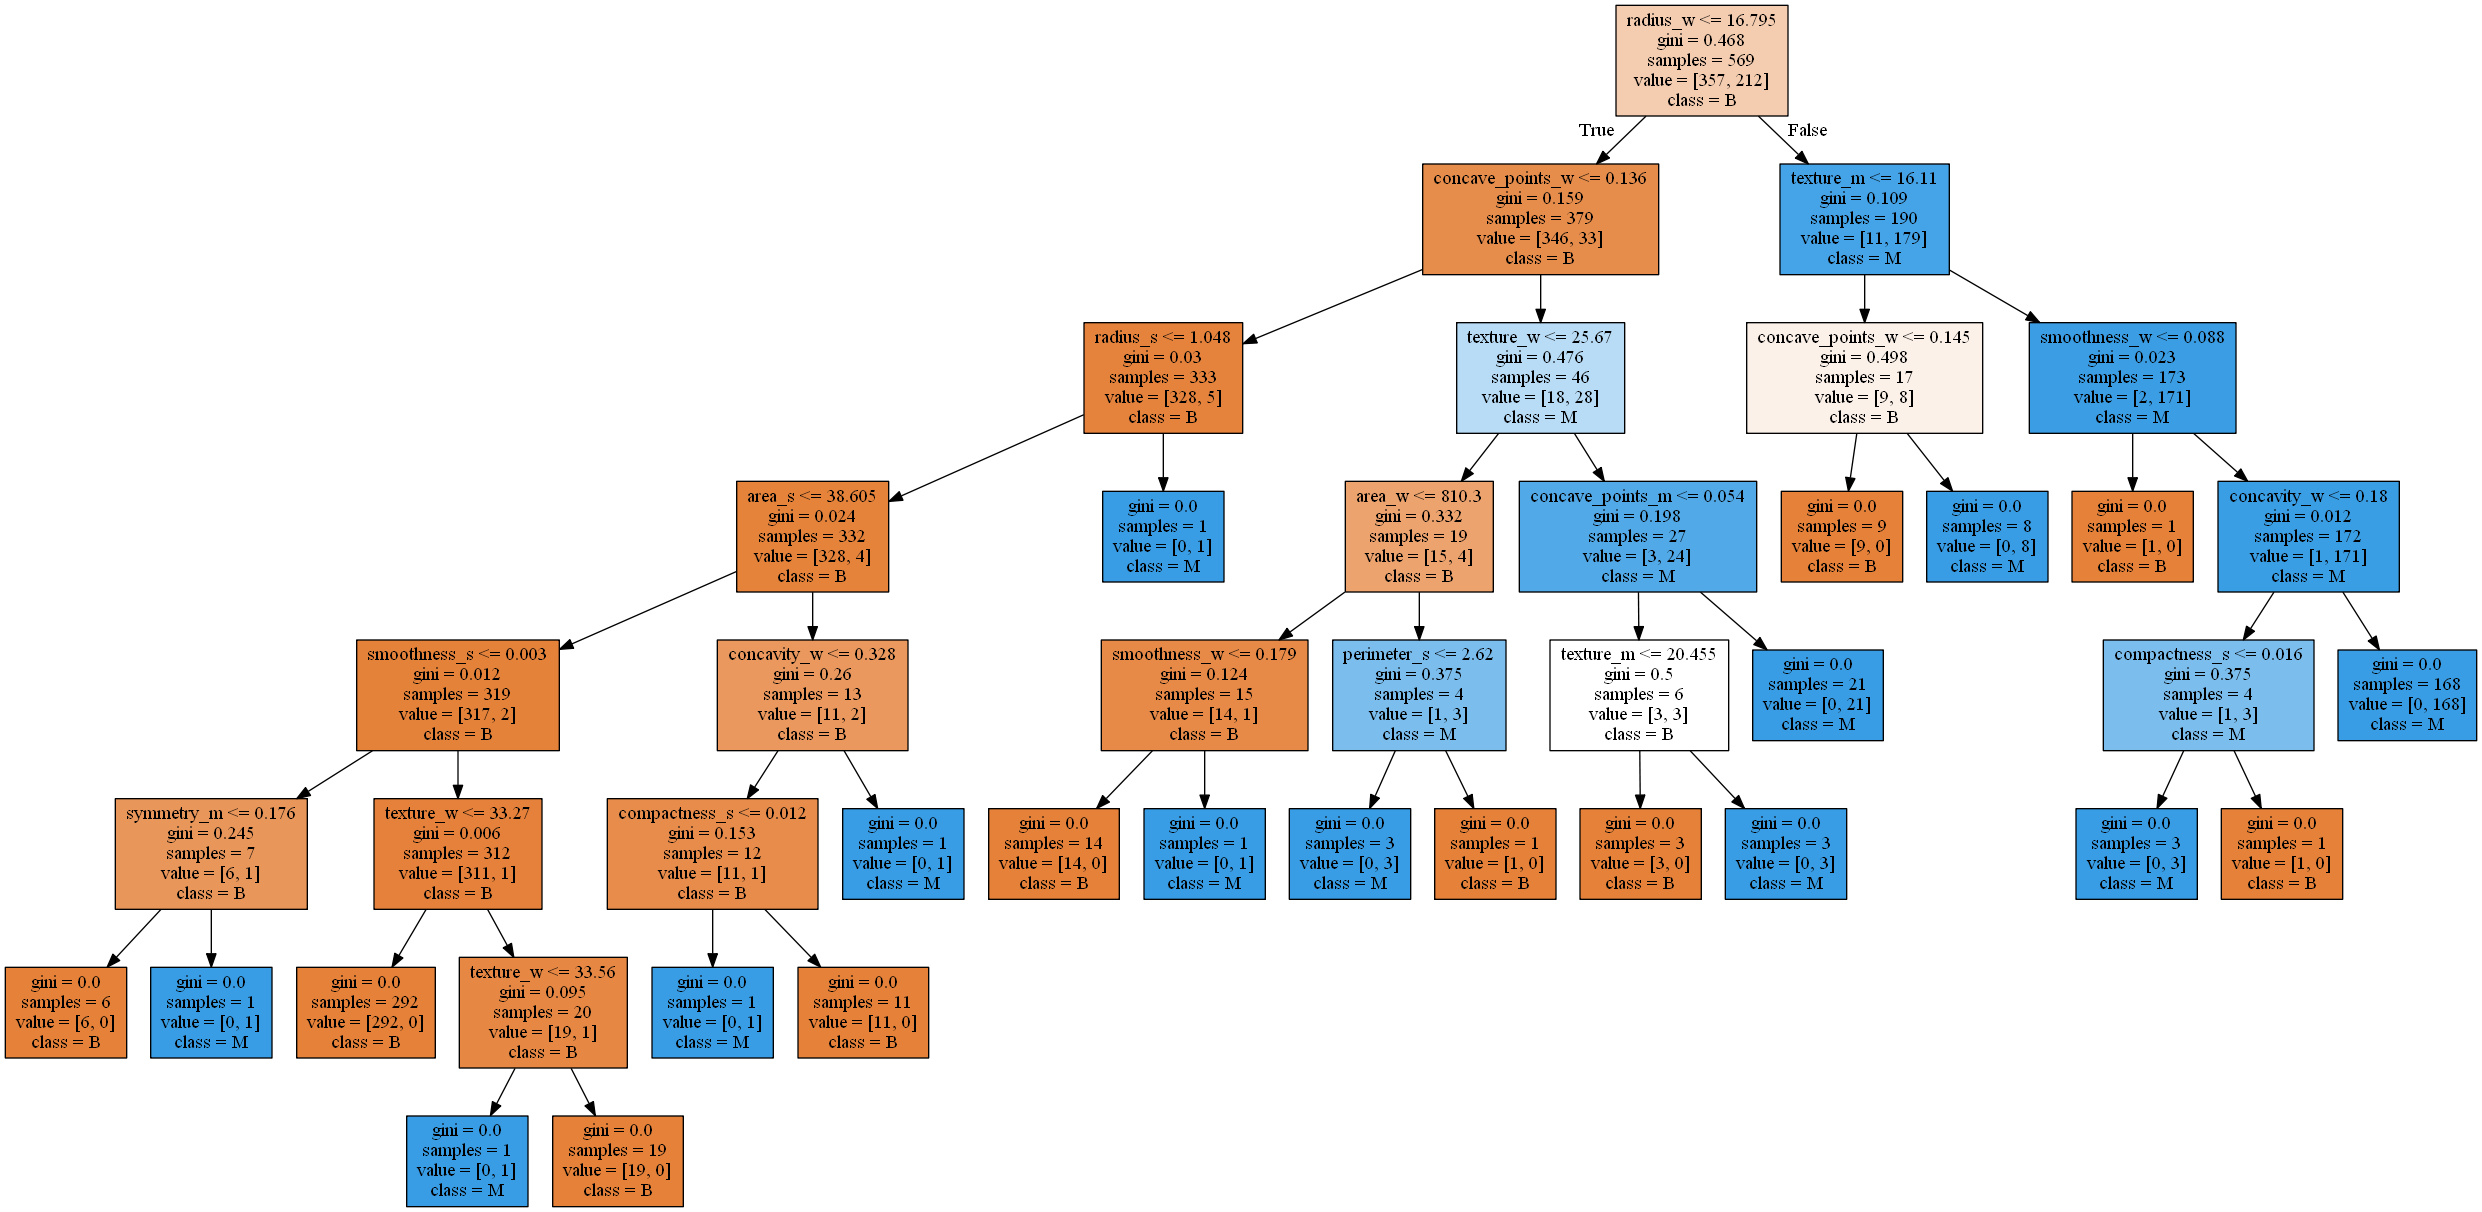

In [5]:
# visualize the tree - orange -> benign, blue -> malignant, white -> 0.5 gini
from six import StringIO 
from IPython.display import Image 
from pydot import graph_from_dot_data
from sklearn.tree import export_graphviz
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, feature_names=x, class_names=y, filled=True)
(graph, ) = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [6]:
# scale the training data
from sklearn import preprocessing
#x = preprocessing.scale(X)
x = preprocessing.robust_scale(X)

In [7]:
# convert the 'M' and 'B' to 1 and 0 respectively for Y
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y2 = le.fit_transform(Y)
y2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [8]:
# training test set split - 75% being used to train and ensuring even stratification of output in test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y2, test_size=0.25, random_state=1, stratify=None)
print(len(y_test))

143


In [18]:
###### random forest ###
# in this case build 250 decision trees
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='gini', max_depth=5, n_estimators=250, random_state=1, n_jobs=4, verbose=0)
forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=4,
                       oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [19]:
# visualise the trees - not usually done but I thought it might be fun

In [20]:
# evaluate the performance of the random forest
from sklearn.metrics import confusion_matrix
y_pred = forest.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

#            predicted
#            N   P
#           +-----
# actual  N |TN  FP
#         P |FN  TP

array([[87,  1],
       [ 5, 50]], dtype=int64)

In [21]:
# what are the results?
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print('Accuracy : %.3f' % accuracy_score(y_pred, y_test))
print('Precision: %.3f' % precision_score(y_pred, y_test))
print('Recall   : %.3f' % recall_score(y_pred, y_test))

Accuracy : 0.958
Precision: 0.909
Recall   : 0.980
